<h2 style="font-size: 1.5em;">Algorithm Overview</h2>
<ol>
  <li><strong style="font-size: 1.2em;">Convert Image to Greyscale:</strong><br>
    Convert the input color image (<code>I</code>) to greyscale (<code>G</code>) using the OpenCV function <code>cv2.cvtColor()</code>.
  </li>

  <li><strong style="font-size: 1.2em;">Adaptive Thresholding:</strong><br>
    Apply adaptive thresholding to the greyscale image (<code>G</code>) using <code>cv2.adaptiveThreshold()</code>. This step helps in segmenting the signature from the background.
  </li>

  <li><strong style="font-size: 1.2em;">Morphological Operations (Opening and Closing):</strong><br>
    <ul>
      <li style="font-size: 1.1em;">Define an elliptical structuring element using <code>cv2.getStructuringElement()</code>.</li>
      <li style="font-size: 1.1em;">Perform erosion, opening, and closing operations on the thresholded image to further enhance the signature region.</li>
    </ul>
  </li>

  <li><strong style="font-size: 1.2em;">Invert Image:</strong><br>
    Invert the processed image to extract the signature by using <code>cv2.bitwise_not()</code>.
  </li>

  <li><strong style="font-size: 1.2em;">Contour Detection:</strong><br>
    Find contours in the binary inverted image using <code>cv2.findContours()</code>.
  </li>

  <li><strong style="font-size: 1.2em;">Find Maximum Contour:</strong><br>
    Identify the contour with the maximum area, assuming it corresponds to the signature.
  </li>

  <li><strong style="font-size: 1.2em;">Bounding Box Calculation:</strong><br>
    Get the bounding box coordinates (x, y, width, height) around the maximum contour.
  </li>

  <li><strong style="font-size: 1.2em;">Expand Bounding Box:</strong><br>
    Expand the bounding box by a specified margin to ensure the signature is fully captured.
  </li>

  <li><strong style="font-size: 1.2em;">Crop Image:</strong><br>
    Crop the original and thresholded images based on the calculated bounding box.
  </li>

  <li><strong style="font-size: 1.2em;">Create White Background:</strong><br>
    Create a white background image with the same dimensions as the cropped signature.
  </li>

  <li><strong style="font-size: 1.2em;">Cut Signature-Shaped Hole:</strong><br>
    Use the thresholded signature as a mask to cut a signature-shaped hole in the white background.
  </li>

  <li><strong style="font-size: 1.2em;">Overlay Signature on Original Image:</strong><br>
    Combine the cropped original image with the signature-shaped hole to create a final result where only the signature is visible.
  </li>

  <li><strong style="font-size: 1.2em;">Output:</strong><br>
    Return the processed image with the extracted signature.
  </li>
</ol>


<h2 style="font-size: 1.5em;">Arguments:</h2>
<p><strong style="font-size: 1.2em;">I (np.ndarray):</strong> Input image in BGR format.</p>

<h2 style="font-size: 1.5em;">Returns:</h2>
<p><strong style="font-size: 1.2em;">np.ndarray:</strong> Processed image containing the extracted signature on a clean white background.</p>


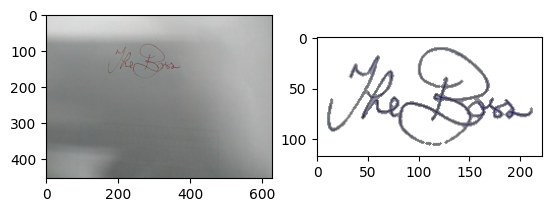

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Please DO NOT add any additional imports to this notebook
# Functionality using libraries other than those listed above will not be graded

def process_image(I: np.ndarray) -> np.ndarray:
    
    # Convert the image to Greyscale
    G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to the grayscale image.
    thresh = cv2.adaptiveThreshold(G, maxValue = 255,
                                adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                thresholdType = cv2.THRESH_BINARY,
                                blockSize = 21,
                                C = 13) 
    
    # Define elliptical structuring element for morphological operations
    structuringElement = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

    # Perform opening and closing 
    eroded = cv2.erode(thresh, structuringElement)
    opening = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, structuringElement)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, structuringElement)
    
    # Invert this to extract just the signature
    inverted = cv2.bitwise_not(closing)

    # Find contours in the binary image
    contours, _ = cv2.findContours(inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the maximum area (assuming it's the signature)
    maxContour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the signature
    x, y, w, h = cv2.boundingRect(maxContour)

    # Expand the bounding box by the margin
    margin = 10
    x = max(0, x - margin)
    y = max(0, y - margin)
    w = min(w + 2 * margin, inverted.shape[1] - x - 2 * margin)
    h = min(h + 2 * margin, inverted.shape[0] - y - 2 * margin)

    # Crop the image to the bounding box
    croppedOriginal = I[y:y+h, x:x+w]
    croppedSignature = thresh[y:y+h, x:x+w]

    #Using this variable instead will clean the signature up a bit but will lose ink colouration, so only use if printing in greyscale
    #cropped_signature = closing[y:y+h, x:x+w]

    # Create a white background image with the same dimensions as the cropped signature
    white = np.ones_like(croppedSignature) * 255
    whiteBackground = cv2.cvtColor(white, cv2.COLOR_BGR2RGB)

    # Cut a signature shaped hole in the white background
    SigHole = cv2.bitwise_or(whiteBackground, whiteBackground, mask=croppedSignature)
    SignatureMask = cv2.cvtColor(SigHole, cv2.COLOR_BGR2RGB)

    # Place the white mask with signature shaped hole over cropped original so only signature shines through
    image = cv2.add(croppedOriginal, SignatureMask)
    result = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return result

# Please DO NOT change any of the code below. All modifications to this template should
# occur inside the **process_image** function

fig, axs = plt.subplots(1, 2)
original = cv2.imread('./Boss.bmp')
extracted_signature = process_image(original)

axs[0].imshow(original)
axs[1].imshow(extracted_signature)




<!-- References -->

<h2>References:</h2>

<!-- Adaptive Thresholding -->
<h3>Adaptive Thresholding</h3>
<p>Apply adaptive thresholding techniques using a Gaussian mean to handle variation in lighting.</p>
<ul>
    <li>Reference: N. Otsu, "A Threshold Selection Method from Gray-Level Histograms," in IEEE Transactions on Systems, Man, and Cybernetics, vol. 9, no. 1, pp. 62-66, Jan. 1979, doi: 10.1109/TSMC.1979.4310076.</li>
    <li>Reference: Class Notes</li>
</ul>

<!-- Structuring Elements -->
<h3>Structuring Elements</h3>
<p>Define elliptical structuring element for morphological operations.</p>
<ul>
    <li>Reference: J. Serra, "Image Analysis and Mathematical Morphology," Academic Press, 1982.</li>
    <li>Reference: Class Notes</li>
</ul>

<!-- Opening and Closing -->
<h3>Opening and Closing</h3>
<p>Perform opening and closing to remove visual noise and connect components.</p>
<ul>
    <li>Reference: R. M. Haralick and L. G. Shapiro, "Computer and Robot Vision," Addison-Wesley, 1992.</li>
    <li>Reference: Class Notes</li>
</ul>

<!-- Bitwise Operations -->
<h3>Bitwise Operations</h3>
<p>Invert a mask to extract just the signature using bitwise operations.</p>
<ul>
    <li>Reference: A. Rosenfeld and A. C. Kak, "Digital Picture Processing," Academic Press, 1982.</li>
    <li>Reference: Class Notes</li>
</ul>

<!-- Contours -->
<h3>Contours</h3>
<p>Find contours in the binary image.</p>
<ul>
    <li>Reference: R.C. Gonzalez and R.E. Woods, "Digital Image Processing," Addison-Wesley, 1992.</li>
    <li>Reference: Class Notes</li>
</ul>

<!-- Bounding Boxes -->
<h3>Bounding Boxes</h3>
<p>Get the bounding box of the signature highlighted by a binary mask.</p>
<ul>
    <li>Reference: P. Perona and J. Malik, "Scale-Space and Edge Detection Using Anisotropic Diffusion," IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 12, no. 7, pp. 629-639, July 1990, doi: 10.1109/34.56205.</li>
    <li>Reference: Class Notes</li>
</ul>

